## FD 2 layers package test


In [1]:
! pip install pmcx
! pip install numpy pmcx jdata bjdata matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.2 MB/s eta 0:00:00
  Created wheel for bjdata: filename=bjdata-0.5.4-cp312-cp312-linux_x86_64.whl size=160293 sha256=88c47c6e7d4f9cdf2f1e8ae253afa623e764ef31176e169d412497f086c71f09
  Stored in directory: /root/.cache/pip/wheels/81/3a/95/b251ca6448eb3ddb9744a772fc78198d16905fc3d4836cf1ae
Successfully built bjdata


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import math
import io

Mounted at /content/drive


In [3]:
# Path to your folder containing the .py script
folder_path = '/content/drive/MyDrive/MCX_data'
sys.path.append(folder_path)
from FD_msNIRS_2layers import mcx_sim_2layers as ms2

### Read CSV and coef

In [4]:
# csv file to simulate: change the path!.
csv_path = '/content/drive/MyDrive/MCX_data/sobol_samples.csv'
df = pd.read_csv(csv_path)
# simulations save path
save_path = '/content/drive/MyDrive/MCX_data/result_folder/'

In [5]:
lambdas = [784, 800, 818, 835, 851, 868, 881, 894]
coef_path = '/content/drive/MyDrive/MCX_data/EC.xlsx'
extinction_coeffs = pd.read_excel(coef_path)

In [6]:
part_str = csv_path.split('/')[-1].replace('.csv', '').split('_')[-2] + '_' + csv_path.split('_')[-1].replace('.csv', '')
print(part_str)
# make in to be .1
df['d1'] = df['d1'].round(0)

sobol_samples


In [7]:
df.head()

,HBO1,HHB1,HBO2,HHB2,d1,a1,a2,b1,b2
0,10.618102,12.007143,46.959818,26.97317,12.0,0.889986,0.645209,1.799264,1.401673
1,18.118102,7.007143,31.959818,16.97317,17.0,2.139986,1.895209,1.049264,0.651673
2,6.868102,4.507143,39.459818,31.97317,19.0,1.514986,2.520209,0.674264,1.776673
3,14.368102,9.507143,54.459818,21.97317,14.0,2.764986,1.270209,1.424264,1.026673
4,16.243102,5.757143,35.709818,29.47317,10.0,0.577486,0.957709,1.236764,1.589173


### Generate data using package

In [8]:
first_row = df.iloc[0]
HBO1=first_row['HBO1']
HHB1=first_row['HHB1']
HBO2=first_row['HBO2']
HHB2=first_row['HHB2']
d1=first_row['d1']
a1=first_row['a1']
a2=first_row['a2']
b1=first_row['b1']
b2=first_row['b2']

In [64]:
distance_data = ms2(hbo1=HBO1, hhb1 =HHB1, hbo2=HBO2, hhb2=HHB2, l1=d1, coef_path = extinction_coeffs, a1=a1, b1=b1, a2 = a2, b2 = b2, tend=1e-08, devf=1, nphoton=1.2e8)

nphoton: 1.2e+08
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0


In [65]:
for k in list(distance_data.keys()):
    distance_data[k] = np.asarray(distance_data[k], dtype=float).ravel().tolist()

In [22]:
distance_data2 = ms2(hbo1=HBO1, hhb1=HHB1, hbo2=HBO2, hhb2=HHB2, l1=d1, coef_path = extinction_coeffs, a1=a1, b1=b1, a2 = a2, b2 = b2, tend=1e-08, devf=1000, nphoton=1.2e8)

nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0


In [29]:
import numpy as np

def auc_by_sd(distance_data2, t0=0.0, t1=1e-8, clip_negative=False):
    """
    distance_data2: dict -> {sd: [trace_wl0, trace_wl1, ..., trace_wl7]}
      each trace_wl* is length-1000 list/array of intensities.
    t0, t1: start/end time in seconds (default 0 to 1e-8).
    clip_negative: if True, negatives set to 0 before integrating.
    returns: dict -> {sd: [auc_wl0, ..., auc_wl7]} (floats)
    """
    out = {}
    for sd, wl_traces in distance_data2.items():
        # stack to (num_wl, num_samples)
        Y = np.vstack([np.asarray(y, dtype=float) for y in wl_traces])
        if clip_negative:
            Y = np.maximum(Y, 0.0)
        n = Y.shape[1]
        t = np.linspace(t0, t1, n, dtype=float)  # 1000 samples over [t0, t1]
        aucs = np.trapz(Y, x=t, axis=1)          # integrate along time axis
        out[sd] = aucs.tolist()
    return out

auc_dict = auc_by_sd(distance_data2, t0=0.0, t1=1e-8)


/tmp/ipython-input-1268692952.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  aucs = np.trapz(Y, x=t, axis=1)          # integrate along time axis


In [43]:
factor = 100_000_000
for sd, vals in auc_dict.items():
    auc_dict[sd] = [float(v) * factor for v in vals]

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sd_comparison_zoom(distance_data, auc_dict,
                            wavelengths=(784, 800, 818, 835, 851, 868, 881, 894),
                            nrows=2, ncols=4, figsize=(16, 10),
                            pad_frac=0.08,
                            title="S-D vs Wavelengths (zoomed)"):
    """One subplot per S-D; each subplot gets its own y-limits (local zoom)."""

    def _to_float_list(x):
        return np.asarray(x, dtype=float).ravel().tolist()

    dist = {sd: _to_float_list(v) for sd, v in distance_data.items()}
    auc  = {sd: _to_float_list(v) for sd, v in auc_dict.items()}
    wl   = np.asarray(list(wavelengths), dtype=float)

    def _as_int(k):
        try: return int(k)
        except: return k
    sd_keys = sorted(set(dist.keys()) | set(auc.keys()), key=_as_int)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, sharex=True, sharey=False)
    axes = np.array(axes).ravel()

    for i, sd in enumerate(sd_keys[:nrows*ncols]):
        ax = axes[i]
        y1 = np.asarray(dist.get(sd, [np.nan]*len(wl)), dtype=float)
        y2 = np.asarray(auc.get(sd,  [np.nan]*len(wl)), dtype=float)

        # colors: black = one time point, red = AUC
        ax.plot(wl - 0.6, y1, marker='o', linewidth=1.8, color='k',
                label='one time point')
        ax.plot(wl + 0.6, y2, marker='s', linewidth=1.8, color='r',
                label='1000 time points (AUC)')

        local_min = np.nanmin([y1.min(), y2.min()])
        local_max = np.nanmax([y1.max(), y2.max()])
        span = max(local_max - local_min, 1e-12)
        ax.set_ylim(local_min - pad_frac*span, local_max + pad_frac*span)

        ax.set_title(f"S-D: {sd} mm")
        ax.grid(True, linestyle='--', alpha=0.35)

        if i % ncols == 0:
            ax.set_ylabel("light intensity")
        if i // ncols == nrows - 1:
            ax.set_xlabel("Wavelength (nm)")
        if i == 0:
            ax.legend(frameon=False)

    for j in range(len(sd_keys), nrows*ncols):
        fig.delaxes(axes[j])

    if title:
        fig.suptitle(title, y=1.02, fontsize=12)
    fig.tight_layout()
    plt.show()
    return fig, axes


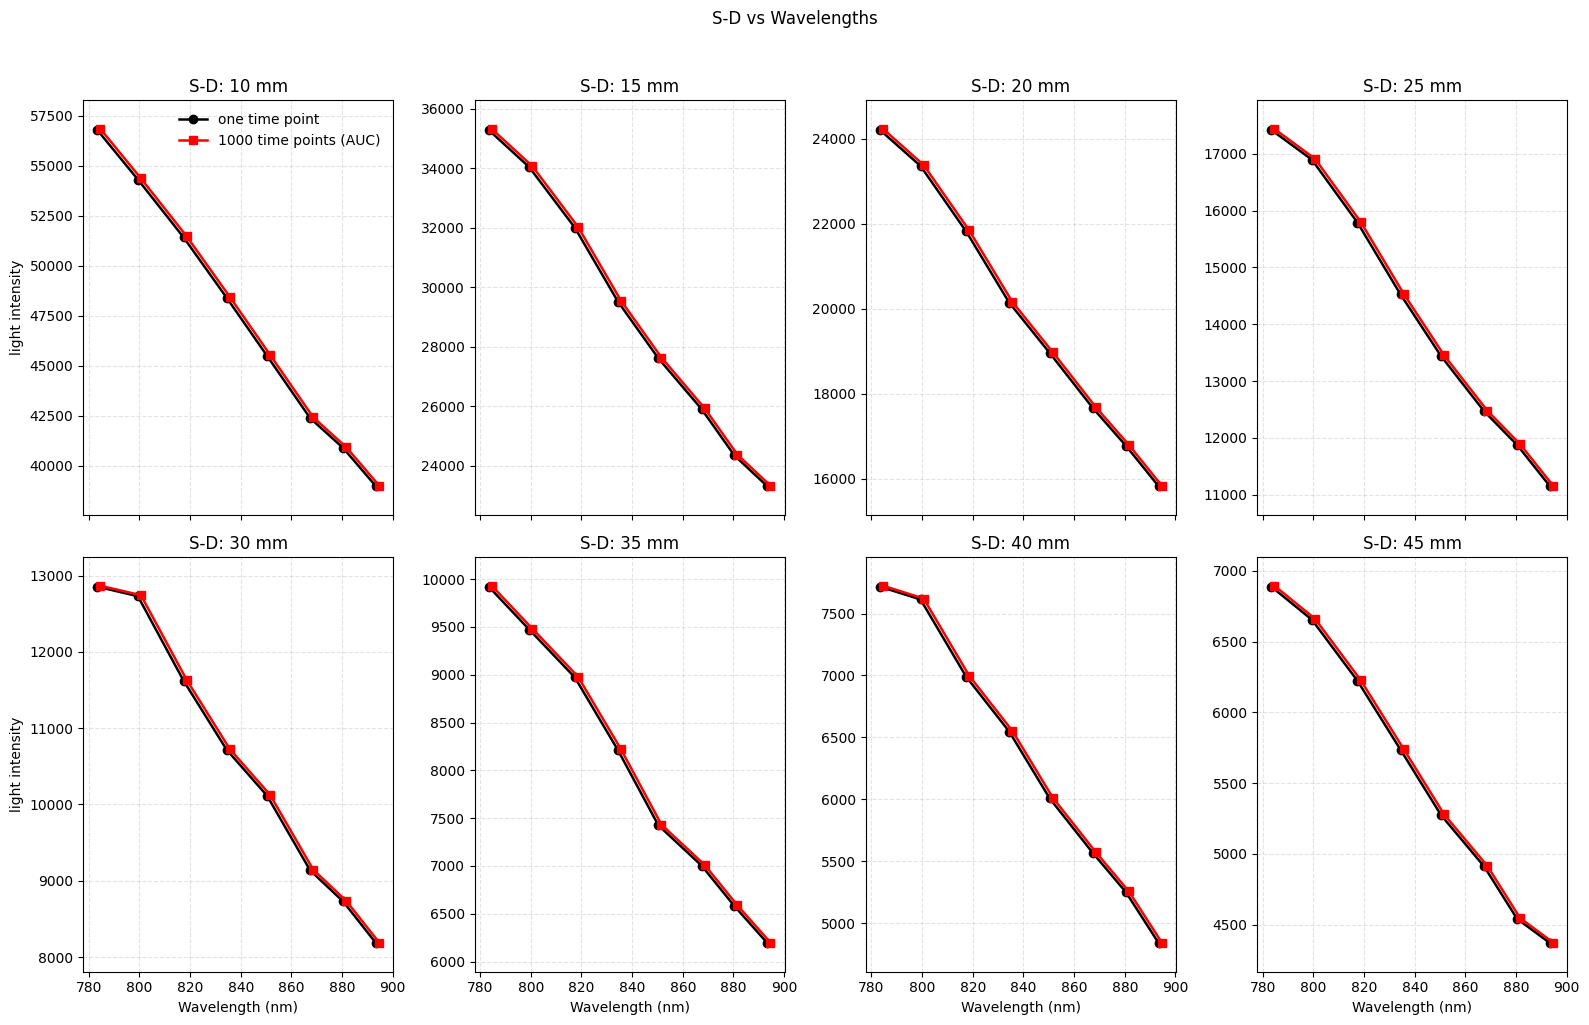

In [82]:
fig, axes = plot_sd_comparison_zoom(distance_data, auc_dict, title="S-D vs Wavelengths")